Wholesale Customers Analysis
Problem Statement:
1. A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Wholesale Customer Dataset

mydata = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


### We identify the following customer variables: 

- Total Number of Retailers: 440 
- Sales Channels: 1.Hotel , 2.Retail
- Regions: 1.Lisbon , 2.Oporto , 3.Other
- Varieties of products=6

First, we check for null values in the dataset

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


Then we remove the column which is not needed

In [5]:
mydata.drop('Buyer/Spender',axis=1,inplace=True)

We have observed that there are no null values.

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

#### Step 1:
Create another column in the existing dataframe which is the sum of all expense in that row.

In [6]:
mydata["Total_Spend"] = mydata["Fresh"]+mydata["Milk"]+mydata["Grocery"]+mydata["Frozen"]+mydata["Detergents_Paper"]+mydata["Delicatessen"]

#### Step 2:
We then use groupby to group the data for the channel and sum functions to get the sum and plot function to plot the results.

In [7]:
mydata.groupby(['Region'])['Total_Spend'].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_Spend, dtype: int64

In [8]:
mydata.groupby(['Channel'])['Total_Spend'].sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total_Spend, dtype: int64

#### Answer for 1.1
Of the 2 different channels:
- expense is more through the "Hotel" channel.
- expense is less through the "Retail" channel.


We do not know how many regions are present in the other category.
Of the 3 different categories of regions:
- "Other" has the highest expense.
- "Oporto" has the lowest expense.

1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer


In [9]:
mydata.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen', 'Total_Spend'],
      dtype='object')

Let's first filter the data and take the columns that are required

In [10]:
mydatafiltered = mydata[['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen','Region','Channel']]
mydatafiltered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Region,Channel
0,12669,9656,7561,214,2674,1338,Other,Retail
1,7057,9810,9568,1762,3293,1776,Other,Retail
2,6353,8808,7684,2405,3516,7844,Other,Retail
3,13265,1196,4221,6404,507,1788,Other,Hotel
4,22615,5410,7198,3915,1777,5185,Other,Retail
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,Other,Hotel
436,39228,1431,764,4510,93,2346,Other,Hotel
437,14531,15488,30243,437,14841,1867,Other,Retail
438,10290,1981,2232,1038,168,2125,Other,Hotel


In [11]:
mydatafiltered.groupby(["Region"]).describe().T

Region                        Lisbon        Oporto          Other
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

In [12]:
mydatafiltered.groupby(["Channel"]).describe().T

Channel                         Hotel        Retail
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC051B2C48>,
      dtype=object)

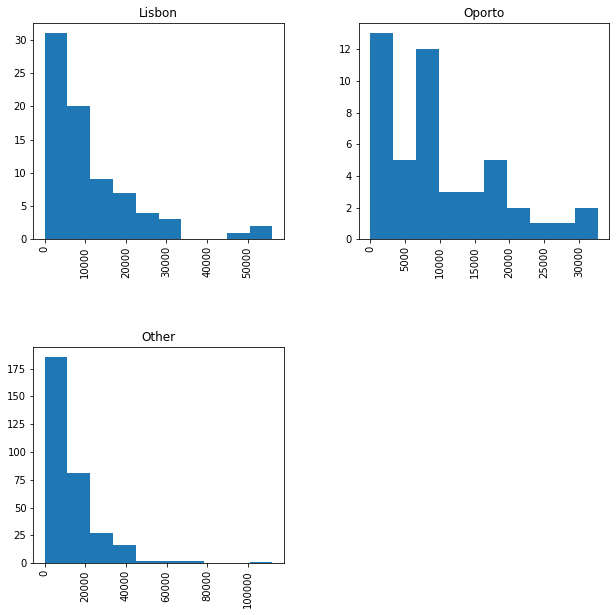

In [13]:
mydatafiltered.hist(by='Region',column = 'Fresh',figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC06B2CF08>,
      dtype=object)

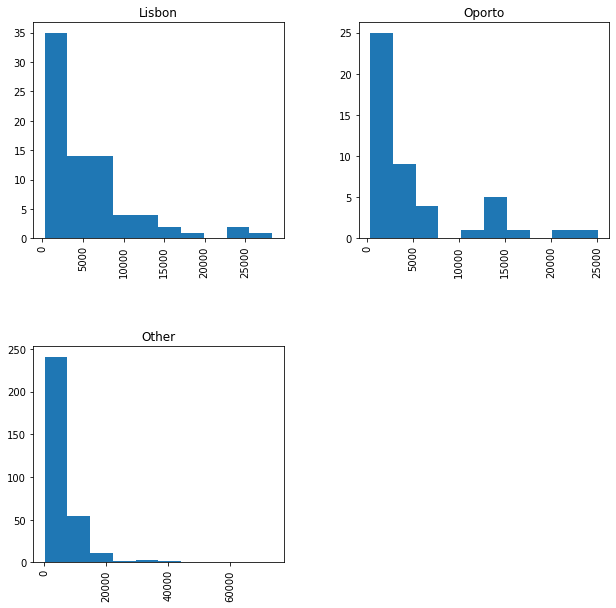

In [14]:
mydatafiltered.hist(by='Region',column = 'Milk',figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC08CCCD08>,
      dtype=object)

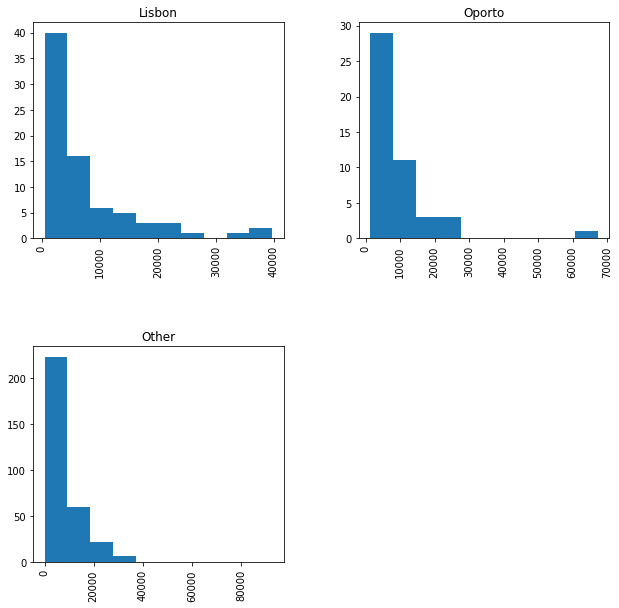

In [30]:
mydatafiltered.hist(by='Region',column = 'Grocery',figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC06BEFFC8>,
      dtype=object)

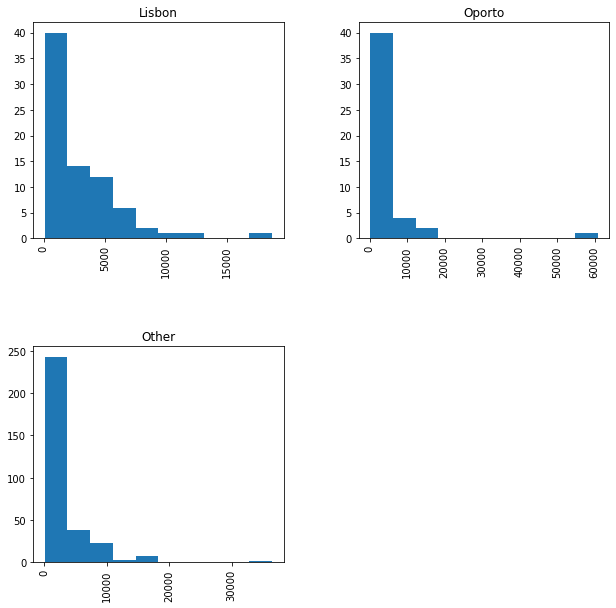

In [16]:
mydatafiltered.hist(by='Region',column = 'Frozen',figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC073B63C8>,
      dtype=object)

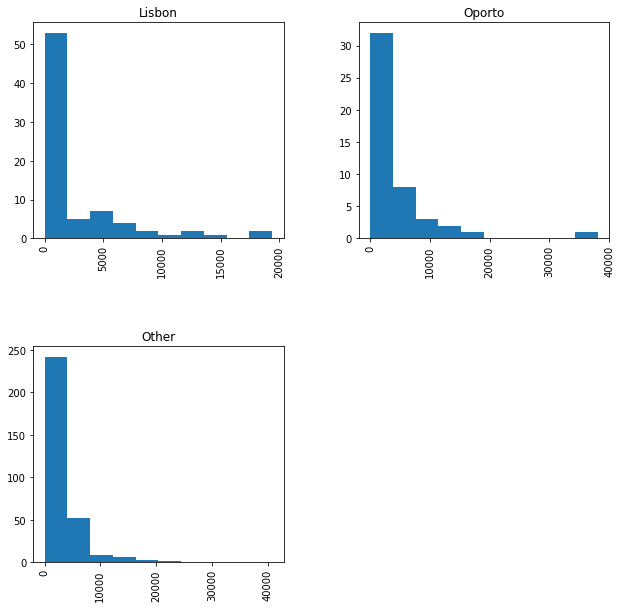

In [17]:
mydatafiltered.hist(by='Region',column = 'Detergents_Paper',figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC0770BF48>,
      dtype=object)

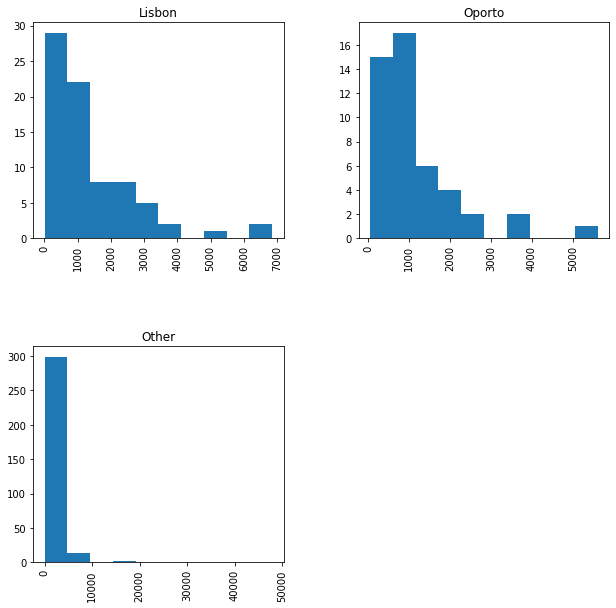

In [18]:
mydatafiltered.hist(by='Region',column = 'Delicatessen',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC07A63708>,
      dtype=object)

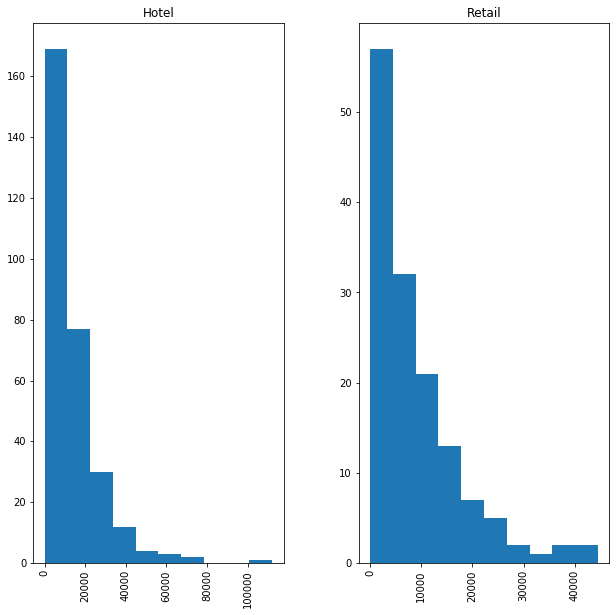

In [19]:
mydatafiltered.hist(by='Channel',column = 'Fresh',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC07E18348>,
      dtype=object)

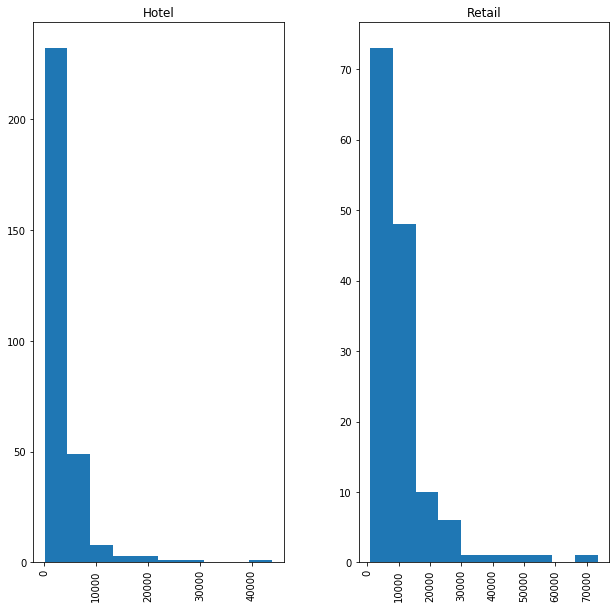

In [20]:
mydatafiltered.hist(by='Channel',column = 'Milk',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC07F15F88>,
      dtype=object)

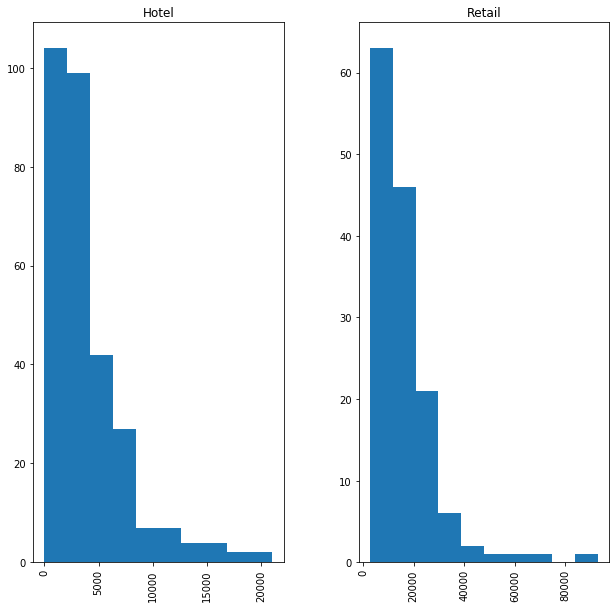

In [21]:
mydatafiltered.hist(by='Channel',column = 'Grocery',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC081DE7C8>,
      dtype=object)

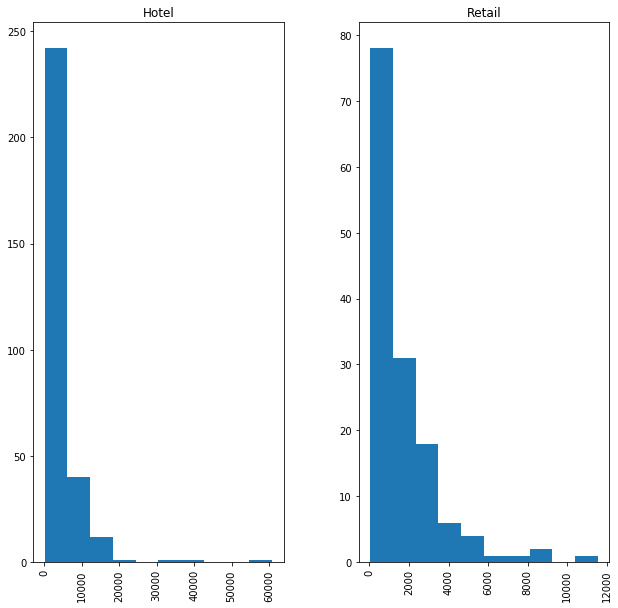

In [22]:
mydatafiltered.hist(by='Channel',column = 'Frozen',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC083FAB48>,
      dtype=object)

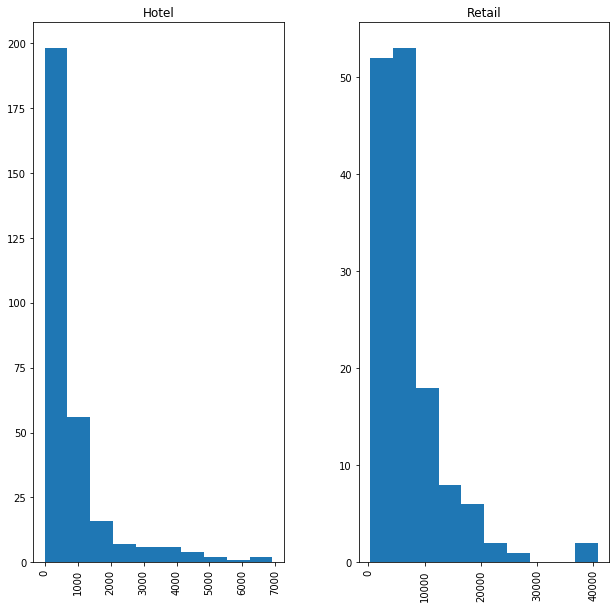

In [23]:
mydatafiltered.hist(by='Channel',column = 'Detergents_Paper',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC084D8588>,
      dtype=object)

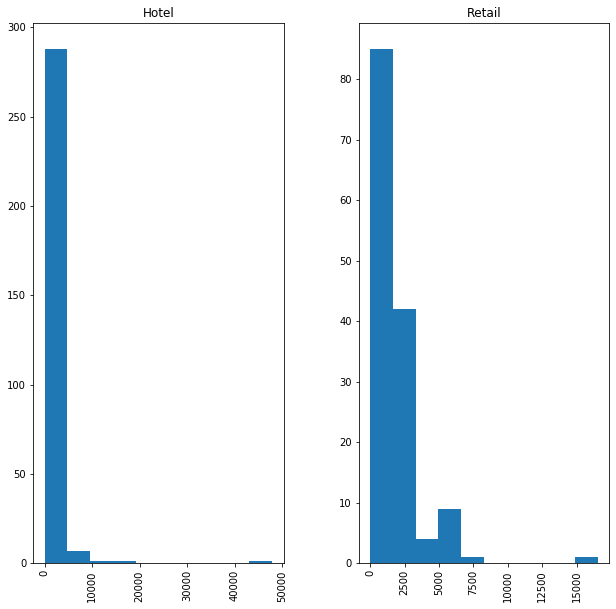

In [24]:
mydatafiltered.hist(by='Channel',column = 'Delicatessen',figsize=(10,10))

#### Answer for 1.2 
When classified by region and when we use the describe funtions, we observed the following
- Fresh has similar mean
- Milk has similar mean
- Delicatessen has similar mean

When classified by Channel and when we use the describe funtions, we observed the following
- Fresh mean differs alot
- Milk mean differs alot
- Grocery mean differs alot
- Frozen mean differs alot
- Detergents paper mean differs alot
- Delicatessen has a similar mean

From the histograms, we observed the following
- Almost all histograms are right skwewed

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?


In [25]:
mydatafiltered.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print('Coefficient of Variation for Fresh is', round((100*12647.3)/12000.3,3))
print('Coefficient of Variation for Milk is', round(100*7380.38/5796.27,3))
print('Coefficient of Variation for Frozen is', round(100*4854.67/2881.49,3))
print('Coefficient of Variation for Grocery is', round(100*9503.16/7951.28,3))
print('Coefficient of Variation for Detergents_Paper is', round(100*4767.85/2881.49,3))
print('Coefficient of Variation for Delicatessen is', round(100*2820.11/1524.87,3))

Coefficient of Variation for Fresh is 105.392
Coefficient of Variation for Milk is 127.33
Coefficient of Variation for Frozen is 168.478
Coefficient of Variation for Grocery is 119.517
Coefficient of Variation for Detergents_Paper is 165.465
Coefficient of Variation for Delicatessen is 184.941


#### Answer for 1.3
We can conculde that Delicatessen shows the most inconsistent behaviour.

1.4 Are there any outliers in the data?

We use box plots to find out if there are outliers.

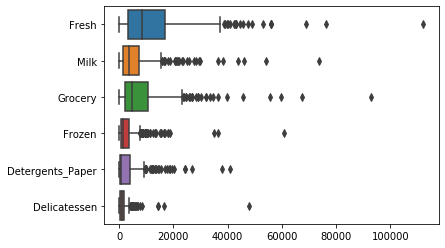

In [27]:
mydata = mydata.drop('Total_Spend',axis=1)
sns.boxplot(data=mydata, orient='h')

#### Answer for 1.4
From the above boxplots, we can say that the data has a lot of outliers.

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective


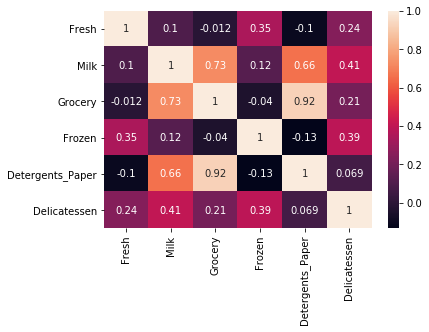

In [28]:
corr = mydatafiltered.corr()
sns.heatmap(corr,annot=True)

#### Answer for 1.5
Using the heatmap, we can identify the products that have a high correlation to each other when customers buy them.

They are:
- Grocery & Milk
- Detergents Paper & Milk
- Detergents Paper & Grocery

We can place the above products next to each other to increase total sales.